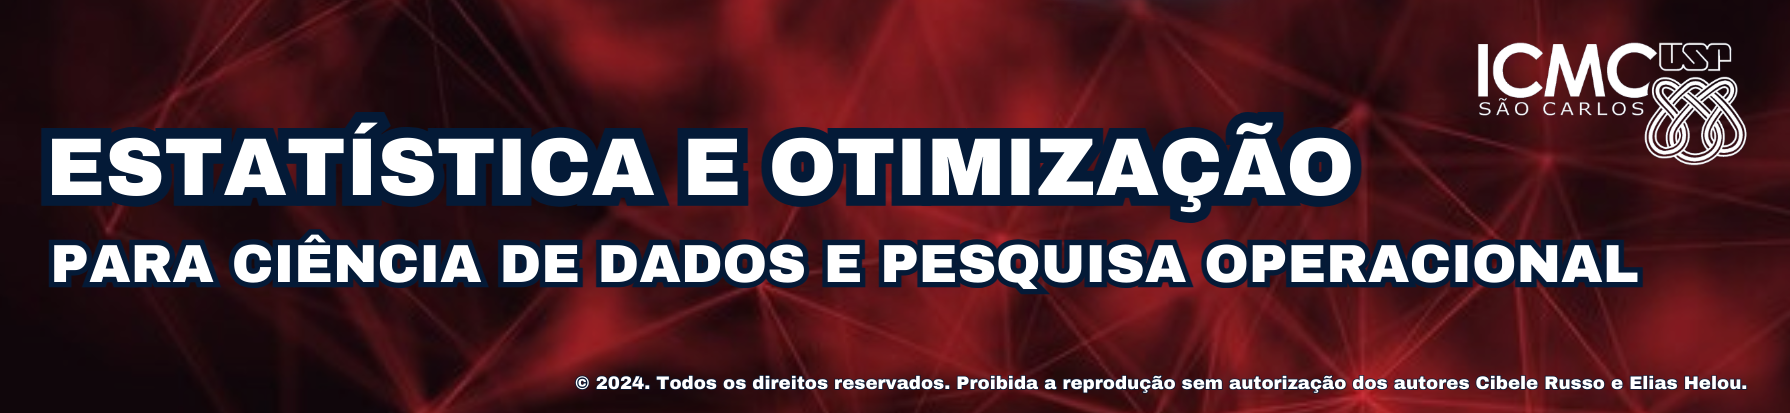

# Apresentação do curso

**05/02/2025**


por **Cibele Russo** (https://linktr.ee/cibelerusso)

**ICMC/USP - São Carlos SP**


Informações em http://cdpo.icmc.usp.br


### Programa

## 1. Estatística

### 1.1. Estatística para Ciência de Dados

<p style='text-align: justify;text-justify: inter-word;'>
    <ul>
        <li>
            Análise Exploratória de Dados
            <ul>
                <li><span style="background-color: yellow;">Tipos de dados</span>, medidas descritivas de tendência central: média, mediana e moda, medidas de dispersão: variância, desvio padrão, amplitude e intervalo interquartil</li>
                <li><span style="background-color: yellow;">Visualização de dados</span></li>
                <li><span style="background-color: yellow;">Associação de variáveis</span></li>
            </ul>
        </li>
        <li>
            Probabilidades
            <ul>
                <li>Conceitos básicos</li>
                <li>Distribuições discretas: Bernoulli, binomial e Poisson</li>
                <li>Distribuições contínuas: uniforme, normal, exponencial e t de Student</li>
                <li>Teorema do Limite Central</li>
            </ul>
        </li>
        <li>
            Inferência estatística
            <ul>
                <li>Estimação pontual e intervalar</li>
                <li><span style="background-color: yellow;">Testes de hipóteses:</span> conceitos e aplicações</li>
            </ul>
        </li>
    </ul>
</p>

### 1.2. Métodos Estatísticos Aplicados

<p style='text-align: justify;text-justify: inter-word;'>
    <ul>
        <li>
            Métodos Não Paramétricos
            <ul>
                <li>Teste Qui-quadrado para associação de variáveis</li>
                <li>Testes de Shapiro-Wilk, Wilcoxon, <span style="background-color: yellow;">Mann-Whitney</span> e Kruskal-Wallis</li>
                <li>Aplicações em ciência de dados</li>
            </ul>
        </li>
        <li>
            Modelagem estatística
            <ul>
                <li>Regressão linear simples e múltipla</li>
                <li>Avaliação de modelos</li>
                <li>Análise de diagnóstico</li>
                <li><span style="background-color: yellow;">Modelo de regressão logística</span></li>
            </ul>
        </li>
        <li>Inferência Bayesiana</li>
    </ul>
</p>


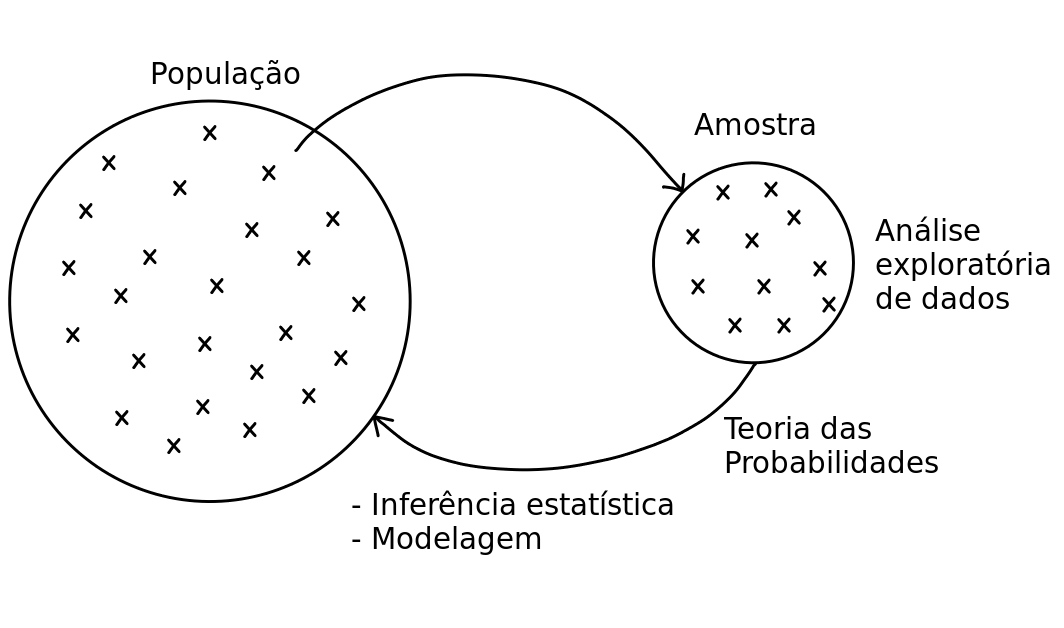

## Motivação

Considere os dados de 230 funcionários de uma empresa. No arquivo DadoseDecisoes.csv, estão disponíveis as variáveis:

- Idade: Idade do funcionário, em anos completos.
- Gênero: Gênero informado, Feminino ou Masculino
- Departamento: TI, RH, Marketing ou Vendas
- Salário: Salário bruto mensal do funcionário, em reais.
- Horas_Trabalhadas: número de horas trabalhadas no último mês
- Produtividade: medida de produtividade entre 0 e 100
- Satisfação: medida de satisfação do funcionário
- Tempo_empresa: tempo, em anos, na empresa
- Cursos_realizados: número de certificados apresentados pelo funcionário
- Home_office: Sim/Não


**Questões de interesse:**

Considere Gênero, Departamento, Produtividade, Satisfação e Home_Office como possíveis variáveis preditoras para **salário com duas categorias, alto e baixo**, que deve ser criada a partir da variável quantitativa contínua Salário.

- Existem associações significativas entre as preditoras com a variável salário?
- Como visualizar essas associações?
- Como criar um modelo estatístico para o salário usando essas preditoras?


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Modifique o caminho se necessário para fazer a leitura dos dados
url = "https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/DadoseDecisoes.csv"

# Dados banco - Leitura dos dados
dados = pd.read_csv(url, index_col=0)

dados

,Idade,Gênero,Departamento,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office
ID,,,,,,,,,,
1,34,Masculino,RH,3848.89,36,84.89,94.33,0,4,Não
2,39,Feminino,Vendas,2536.32,48,107.84,98.62,4,9,Sim
3,39,Masculino,Marketing,7377.81,44,95.66,80.23,11,6,Sim
4,27,Feminino,Vendas,2536.32,40,88.89,94.63,8,1,Sim
5,41,Feminino,Vendas,2536.32,37,80.97,86.44,11,12,Não
...,...,...,...,...,...,...,...,...,...,...
226,36,Feminino,RH,3711.26,34,81.89,76.52,9,1,Não
227,21,Feminino,Marketing,2536.32,34,85.63,100.00,0,0,Não
228,43,Feminino,Vendas,5717.90,38,86.55,82.46,12,11,Não


In [33]:
dados.columns

Index(['Idade', 'Gênero', 'Departamento', 'Salário', 'Horas_Trabalhadas',
       'Produtividade', 'Satisfação', 'Tempo_Empresa', 'Cursos_Realizados',
       'Home_Office'],
      dtype='object')

### Salário é uma variável quantitativa contínua, vamos dicotomizá-la, mas antes vamos olhar para a sua distribuição e características

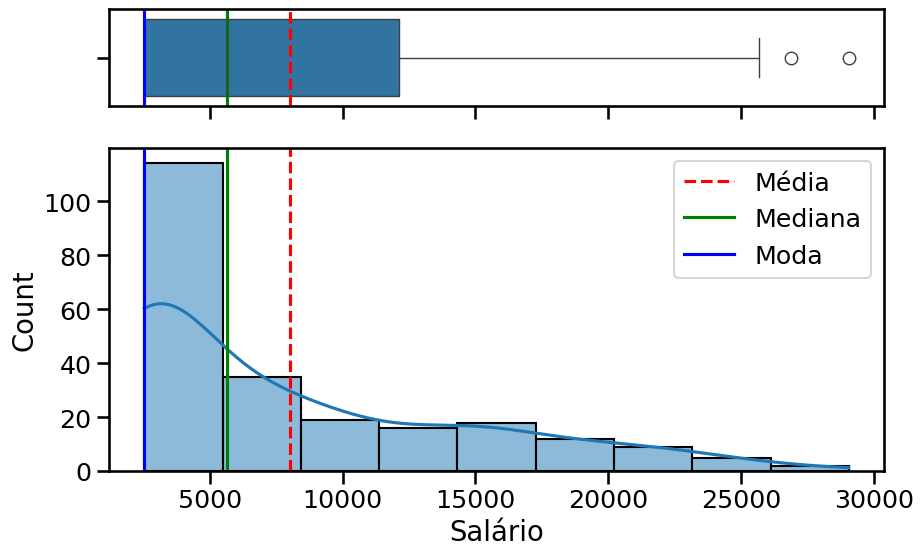

In [34]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})

# Cálculo das medidas descritivas média, mediana e moda
mean=dados['Salário'].mean()
median=dados['Salário'].median()
mode=dados['Salário'].mode().values[0]

# Gráfico de caixa ou boxplot com medidas descritivas indicadas
sns.boxplot(data=dados, x='Salário', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# Histograma com medidas descritivas indicadas
sns.histplot(data=dados, x='Salário', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Média")
ax_hist.axvline(median, color='g', linestyle='-', label="Mediana")
ax_hist.axvline(mode, color='b', linestyle='-', label="Moda")

plt.legend()

ax_box.set(xlabel='')
plt.show()

In [35]:
mediana_salario = dados['Salário'].median()

# Criar a variável salário binária (0 para salários abaixo do valor de corte, 1 para salários acima)
dados['salário'] = dados['Salário'].apply(lambda x: 'Alto' if x >= mediana_salario else 'Baixo')
dados.drop('Salário', axis=1)


,Idade,Gênero,Departamento,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office,salário
ID,,,,,,,,,,
1,34,Masculino,RH,36,84.89,94.33,0,4,Não,Baixo
2,39,Feminino,Vendas,48,107.84,98.62,4,9,Sim,Baixo
3,39,Masculino,Marketing,44,95.66,80.23,11,6,Sim,Alto
4,27,Feminino,Vendas,40,88.89,94.63,8,1,Sim,Baixo
5,41,Feminino,Vendas,37,80.97,86.44,11,12,Não,Baixo
...,...,...,...,...,...,...,...,...,...,...
226,36,Feminino,RH,34,81.89,76.52,9,1,Não,Baixo
227,21,Feminino,Marketing,34,85.63,100.00,0,0,Não,Baixo
228,43,Feminino,Vendas,38,86.55,82.46,12,11,Não,Alto


### Estatísticas descritivas para variáveis quantitativas

In [36]:
np.round(dados.describe(),2)

,Idade,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados
count,230.00,230.00,230.00,230.00,230.00,230.00,230.00
mean,30.55,8029.97,38.85,87.85,86.15,6.77,5.20
std,8.22,6556.33,5.82,12.24,12.06,5.96,4.22
min,18.00,2536.32,30.00,65.74,39.42,0.00,0.00
25%,24.00,2536.32,34.00,77.12,77.57,1.00,2.00
50%,29.00,5667.56,38.00,87.04,87.73,6.00,5.00
75%,35.00,12129.21,44.00,98.42,96.19,11.00,8.00
max,54.00,29052.82,48.00,112.06,100.00,30.00,20.00


### Estatísticas descritivas para variáveis quantitativas condicionado ao salário (dicotomizado)

In [37]:
dados.groupby(by='salário')

## Associação de variáveis com salário: depende dos tipos de variáveis

Variáveis quantitativas: Idade, Horas_Trabalhadas,
       Produtividade, Satisfação, Tempo_Empresa, Cursos_Realizados
       
Variáveis qualitativas: Gênero, Departamento, Home_Office

<ipython-input-38-9b03b6e93493>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dados['Produtividade'], x = dados['salário'], palette='Set2');


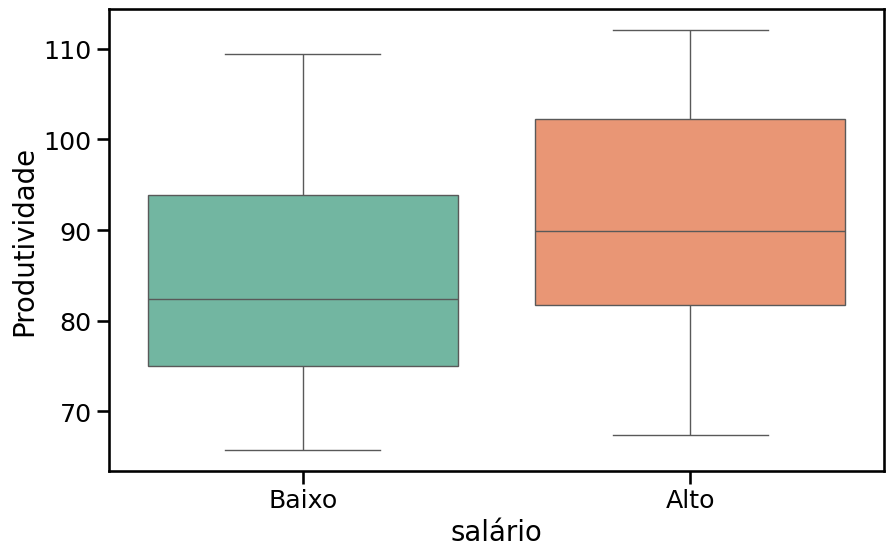

In [38]:
sns.boxplot(y=dados['Produtividade'], x = dados['salário'], palette='Set2');

<ipython-input-39-da99d7ebec2d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = dados, y='Satisfação', x = 'salário', palette='Set2');


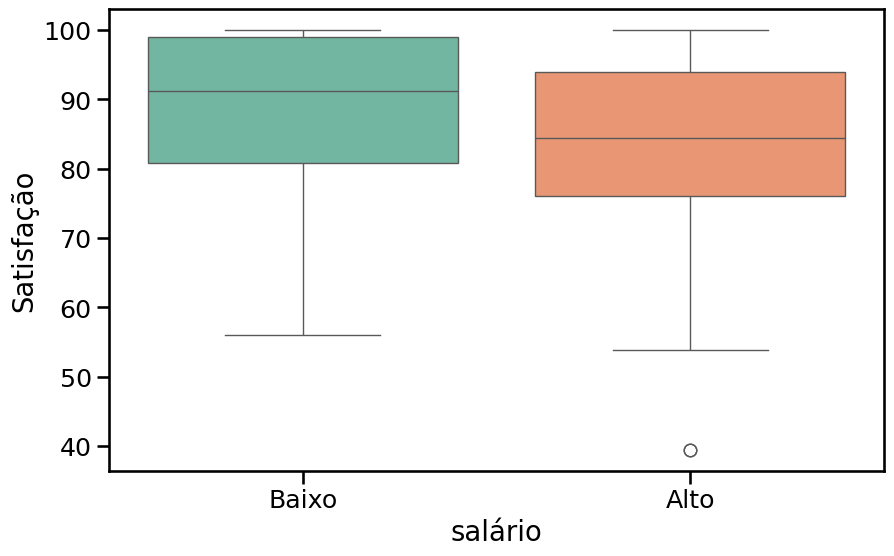

In [39]:
sns.boxplot(data = dados, y='Satisfação', x = 'salário', palette='Set2');

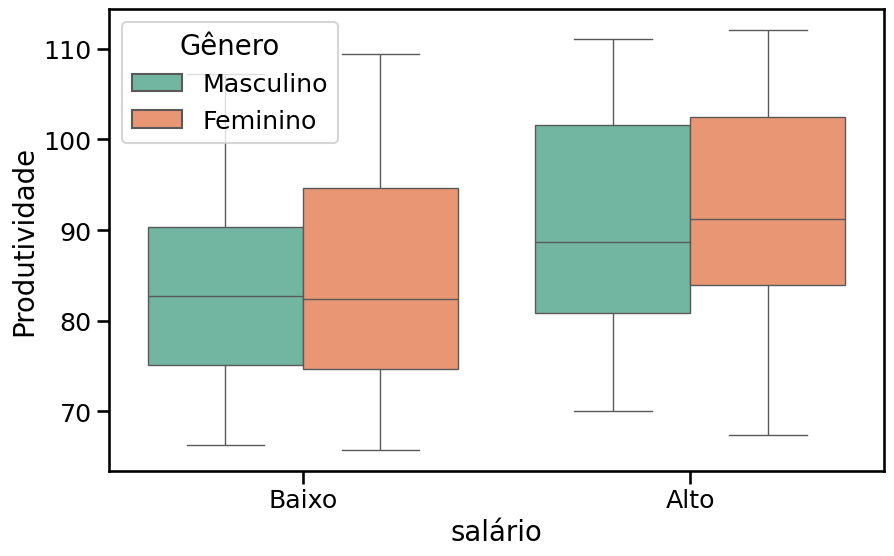

In [40]:
sns.boxplot(data = dados, y='Produtividade', x = 'salário', hue='Gênero', palette='Set2');

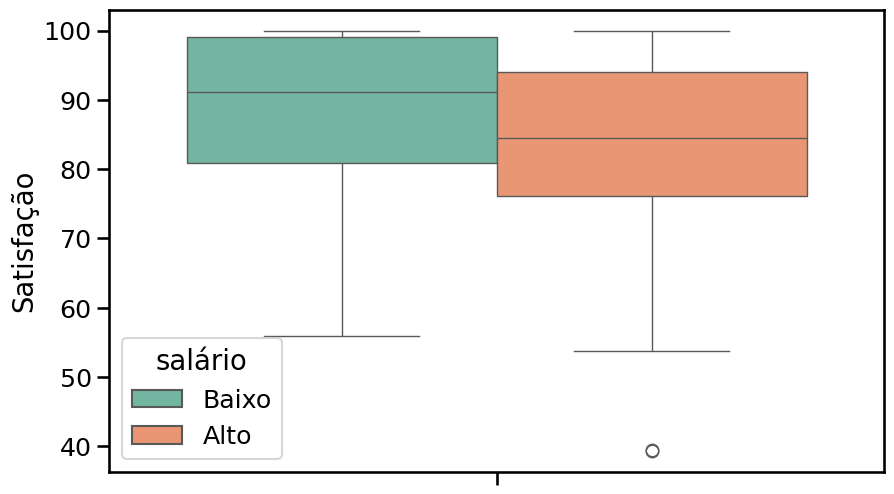

In [41]:
sns.boxplot(y=dados['Satisfação'], hue = dados['salário'], palette='Set2');

#### Existe associação de Produtividade com salário, condicionando ao departamento?

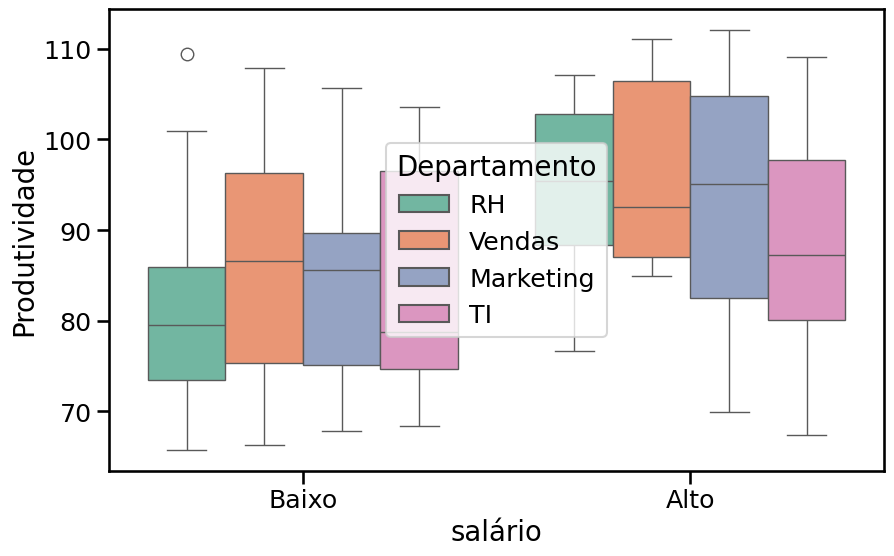

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=dados['Produtividade'], x = dados['salário'], hue=dados['Departamento'], palette='Set2');

### Associação entre duas variáveis qualitativas

In [43]:
# Tabela de contingência

tabela_dupla = pd.crosstab(index=dados['salário'], columns=dados['Gênero'])

tabela_dupla

Gênero,Feminino,Masculino
salário,,
Alto,41,74
Baixo,61,54


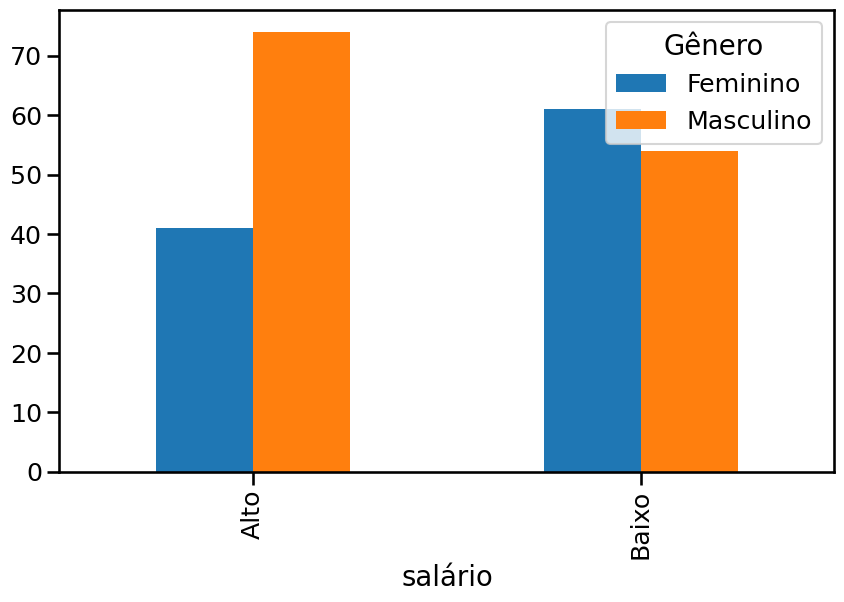

In [44]:
tabela_dupla.plot.bar()

plt.legend(title='Gênero')

plt.show()

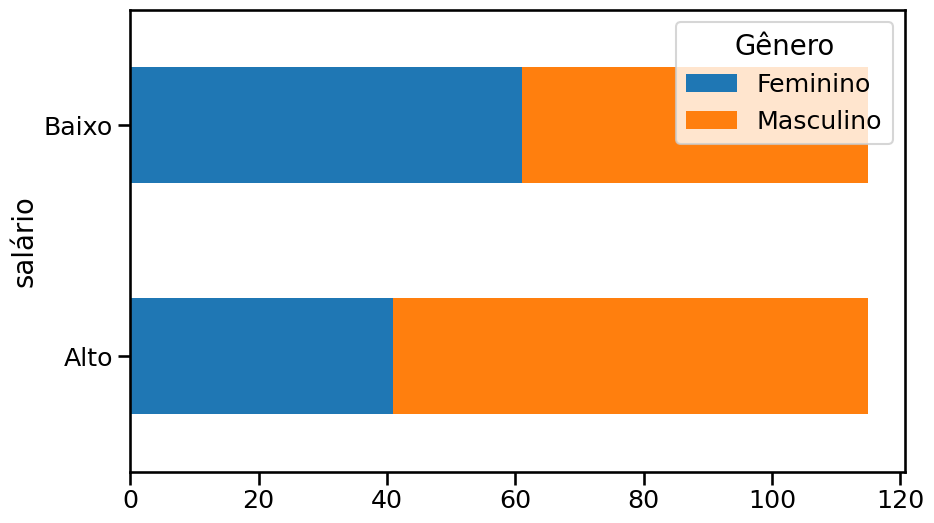

In [45]:
tabela_dupla.plot.barh(stacked=True)

plt.legend(title='Gênero')

plt.show()

### Associação entre três variáveis qualitativas?

In [46]:
tabela_dupla = pd.crosstab(index=[dados['Departamento'], dados['Gênero']], columns=dados['salário'], normalize='index')

tabela_dupla

salário                     Alto     Baixo
Departamento Gênero                       
Marketing    Feminino   0.500000  0.500000
             Masculino  0.620690  0.379310
RH           Feminino   0.230769  0.769231
             Masculino  0.368421  0.631579
TI           Feminino   0.709677  0.290323
             Masculino  0.906977  0.093023
Vendas       Feminino   0.120000  0.880000
             Masculino  0.270270  0.729730

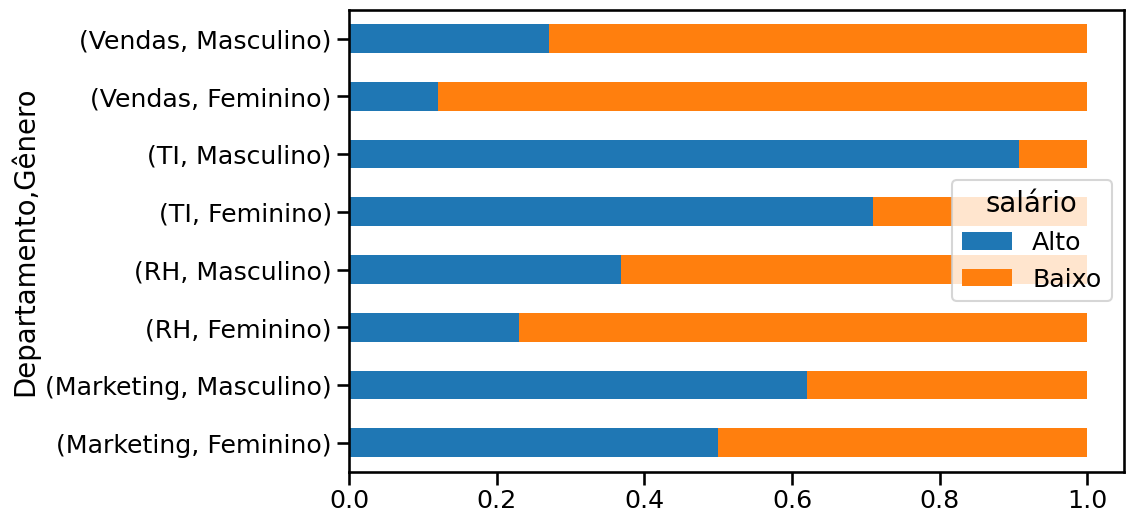

In [47]:
tabela_dupla.plot.barh(stacked=True)

plt.legend(title='salário')

plt.show()

### Gráfico de mosaico

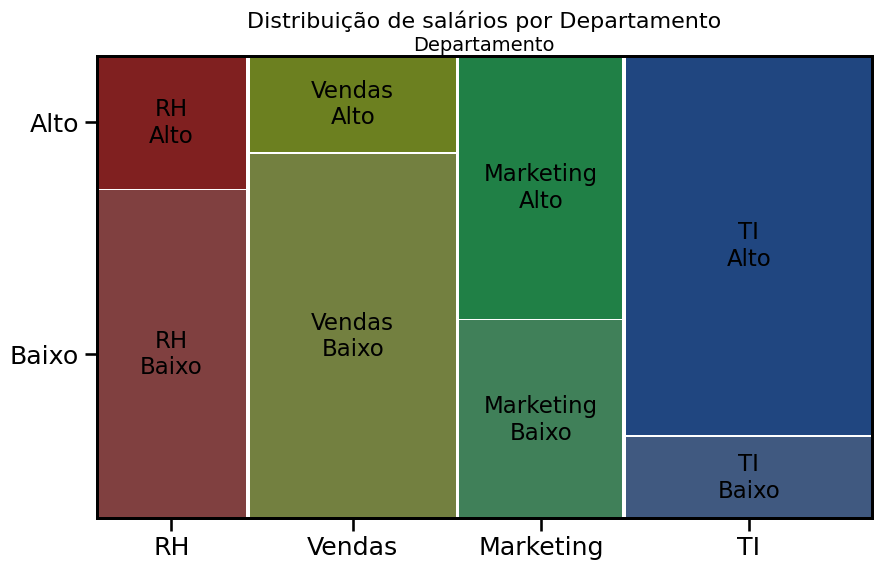

In [48]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams["figure.figsize"] = [10,6]

mosaic(dados,['Departamento', 'salário'] );


# Adicionar rótulos e título
plt.title("Distribuição de salários por Departamento", fontsize=16)
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Home Office', fontsize=14)

# Exibir o gráfico
plt.show()


## Associação entre variáveis quantitativas

**Gráfico de dispersão**

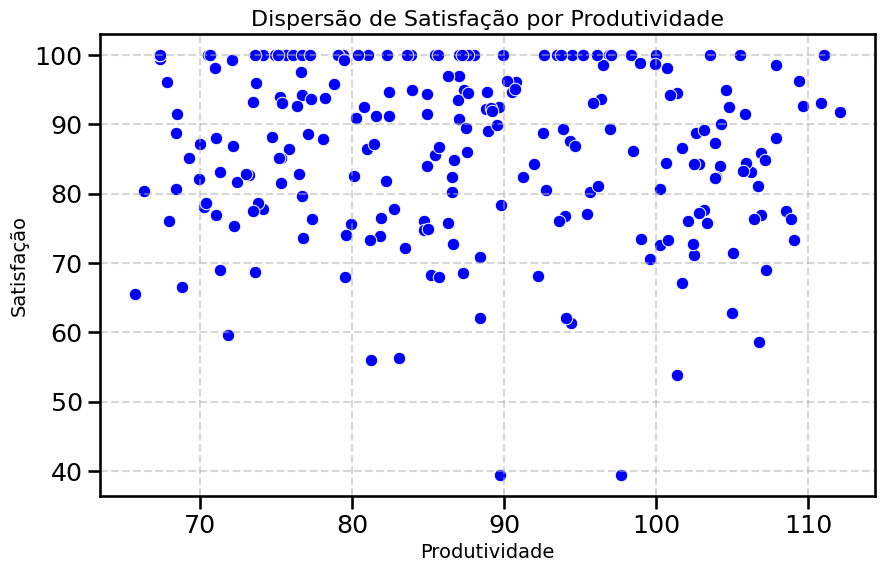

In [49]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, y='Satisfação', x='Produtividade', color='blue', alpha=1)
plt.title('Dispersão de Satisfação por Produtividade', fontsize=16)
plt.ylabel('Satisfação', fontsize=14)
plt.xlabel('Produtividade', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Gráficos com reta de Regressão**

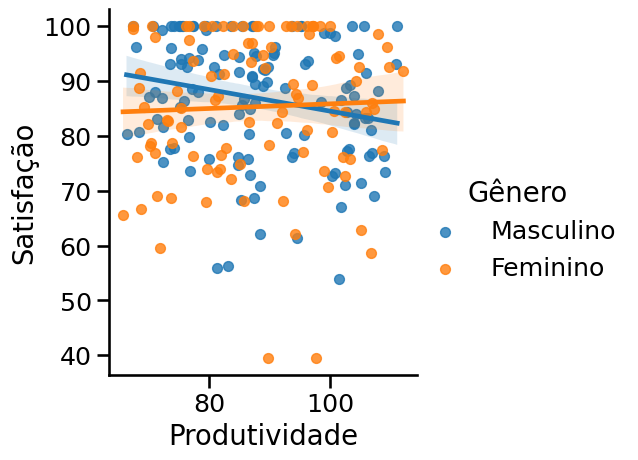

In [50]:
sns.set_context("talk", font_scale=1.1)
sns.lmplot(y='Satisfação', x='Produtividade', hue='Gênero',  data=dados, fit_reg=True, scatter_kws={'s': 50});

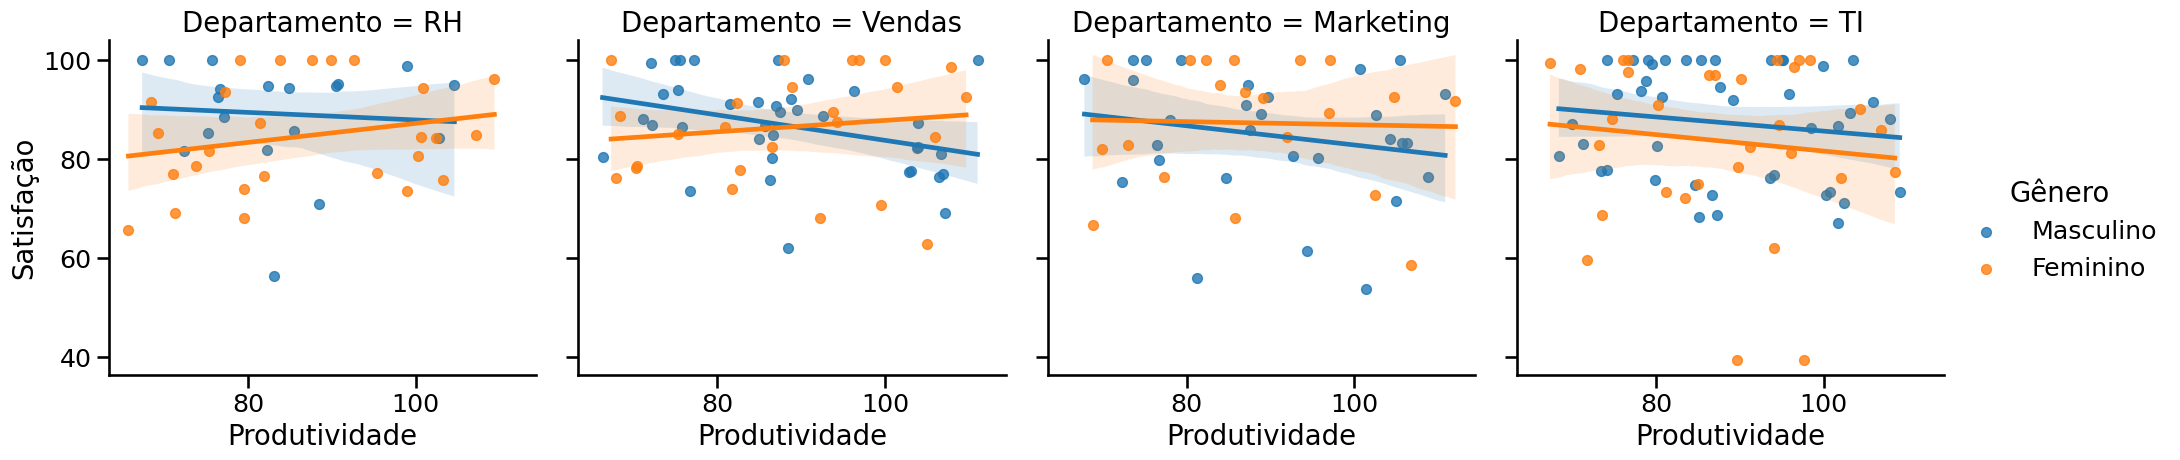

In [51]:
sns.set_context("talk", font_scale=1.1)
sns.lmplot(y='Satisfação', x='Produtividade', hue='Gênero', col='Departamento', data=dados, fit_reg=True, scatter_kws={'s': 50});

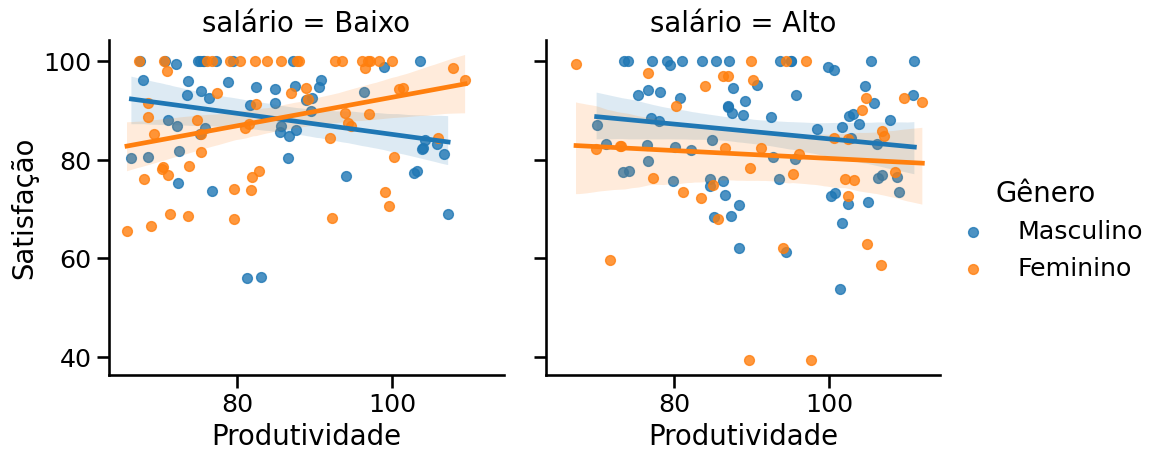

In [52]:
sns.set_context("talk", font_scale=1.1)
sns.lmplot(y='Satisfação', x='Produtividade', hue='Gênero', col='salário',  data=dados, fit_reg=True, scatter_kws={'s': 50});

## Inferência Estatística

Como avaliar se existe diferença na variável Produtividade para pessoas que têm salários altos e baixos?

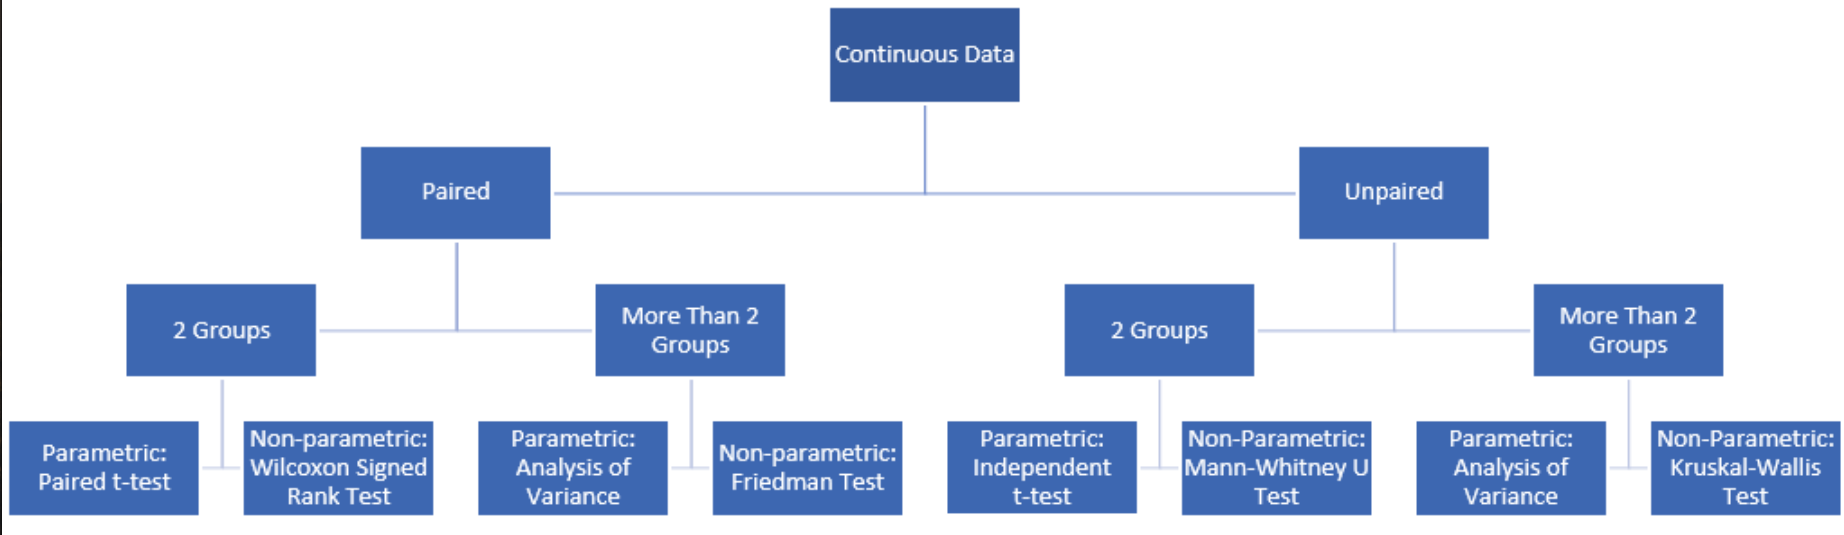

Fonte: https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

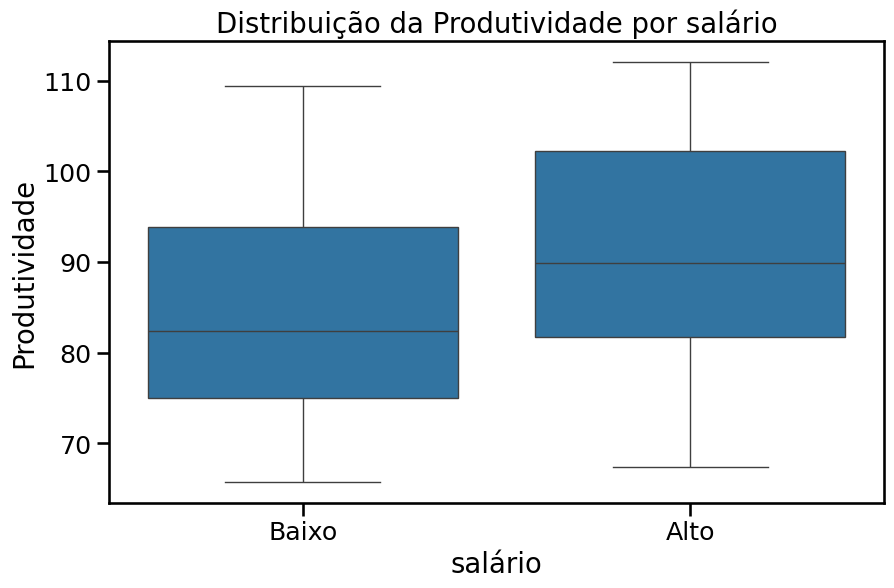

In [53]:
# Primeiro passo: Visualização dos dados

sns.boxplot(x='salário', y='Produtividade', data=dados)
plt.title('Distribuição da Produtividade por salário')
plt.show()

In [54]:
from scipy import stats

produtividade_s1 = dados[dados['salário'] == 'Alto']['Produtividade']
produtividade_s0 = dados[dados['salário'] == 'Baixo']['Produtividade']

# Teste de normalidade (Shapiro-Wilk)
stat_s1, p_s1 = stats.shapiro(produtividade_s1)
stat_nao_s0, p_nao_s0 = stats.shapiro(produtividade_s0)

print(f'Teste de normalidade (Shapiro-Wilk) - salário 1: p-value = {np.round(p_s1,3)}')
print(f'Teste de normalidade (Shapiro-Wilk) - salário 0: p-value = {np.round(p_nao_s0,3)}')


Teste de normalidade (Shapiro-Wilk) - salário 1: p-value = 0.002
Teste de normalidade (Shapiro-Wilk) - salário 0: p-value = 0.0


In [55]:
# Teste de hipóteses para comparação de médias

# Caso a normalidade seja rejeitada, usamos o teste Mann-Whitney
# Caso não rejeitemos a normalidade, usamos o teste t de Student
if p_s1 < 0.05 or p_s0 < 0.05:
    print("A normalidade foi rejeitada, utilizando o teste de Mann-Whitney.")
    stat, p = stats.mannwhitneyu(produtividade_s1, produtividade_s0)
else:
    print("A normalidade não foi rejeitada, utilizando o teste t de Student.")
    stat, p = stats.ttest_ind(produtividade_s1, produtividade_s0)

print(f'Estatística de teste: {stat}')
print(f'p-value: {np.round(p,3)}')


if p_s1 < 0.05 or p_s0 < 0.05:
    print("Como rejeitamos a normalidade dos dados, utilizando o teste de Mann-Whitney.")
    stat, p = stats.mannwhitneyu(produtividade_s1, np.round(produtividade_s0,3))
else:
    print("Como não rejeitamos a normalidade dos dados, utilizando o teste t de Student.")
    stat, p = stats.ttest_ind(produtividade_s1, np.round(produtividade_s0,3))

stat, p

if p < 0.05:
    print("Rejeitamos H0, o que indica que a produtividade é diferente nos grupos de salário alto e baixo.")
    stat, p
else:
    print("Não rejeitamos H0, o que indica que a produtividade pode ser considerada equivalente nos dois grupos")
    stat, p


A normalidade foi rejeitada, utilizando o teste de Mann-Whitney.
Estatística de teste: 8723.5
p-value: 0.0
Como rejeitamos a normalidade dos dados, utilizando o teste de Mann-Whitney.
Rejeitamos H0, o que indica que a produtividade é diferente nos grupos de salário alto e baixo.



## E um modelo de regressão logística?

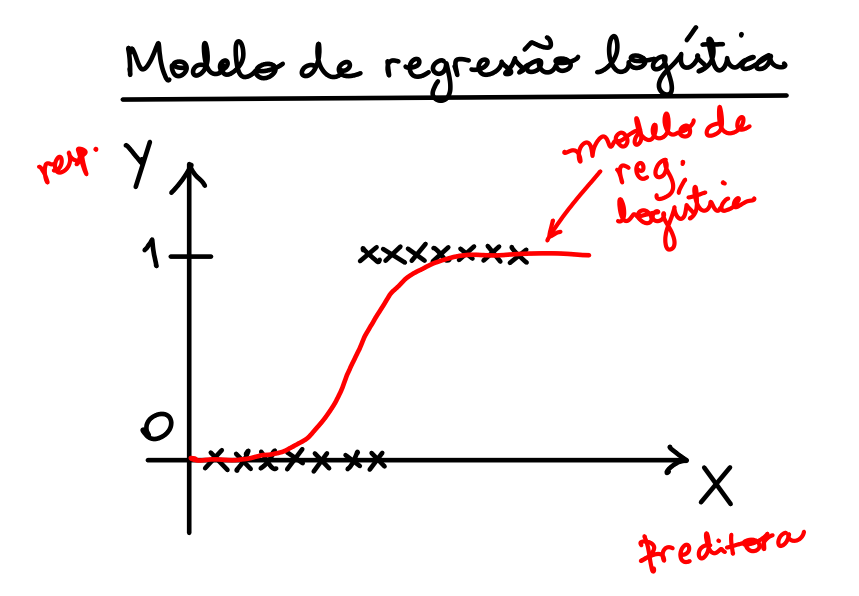

Antes precisamos criar variáveis dummy para as qualitativas (categóricas)



In [56]:
import statsmodels.api as sm

dados_modelo = pd.get_dummies(dados, columns=['Gênero', 'Departamento', 'Home_Office', 'salário'])

X = dados_modelo[['Gênero_Masculino','Departamento_Marketing','Departamento_TI',
       'Departamento_Vendas','Produtividade','Home_Office_Sim']]  # Variáveis preditoras
y = dados_modelo['salário_Alto']  # Variável dependente (resposta)

X = sm.add_constant(X)

In [57]:
X = X.astype(int)
y = y.astype(int)

In [58]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo de regressão logística
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())



In [59]:
result = model.fit()

# Resumo do modelo
print(result.summary())

# Predição
y_pred = result.predict(X_test)

# Ponto de corte de 0.5 para classificar como 0 ou 1
y_pred_class = (y_pred > 0.5).astype(int)

# Avaliar a acurácia
accuracy = (y_pred_class == y_test).mean()
print(f'Acurácia do modelo: {accuracy:.4f}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:           salário_Alto   No. Observations:                  161
Model:                            GLM   Df Residuals:                      154
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72.497
Date:                Wed, 05 Feb 2025   Deviance:                       144.99
Time:                        20:43:46   Pearson chi2:                     141.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3847
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7

### Interpretação dos coeficientes do modelo de regressão logística: Odds ratio



In [60]:
np.exp(1.0370)

2.8207420820631355

In [61]:
np.exp(3.0516)

21.14915601567805

In [62]:
np.exp(0.0780)

1.081122658670083